# Aula 6 - Superposição

Jupyter Notebook desenvolvido por [Gustavo S.S.](https://github.com/GSimas)

> "O seu sucesso como engenheiro será diretamente proporcional à sua habilidade em se comunicar!" - Charles K. Alexander

## Análise de Malhas x Análise Nodal
As redes que contêm
muitos elementos conectados em série, fontes de tensão ou supermalhas são
mais adequadas para análise de malhas, enquanto as redes com elementos associados
em paralelo, fontes de corrente ou supernós são mais adequadas para
análise nodal.

**O segredo é selecionar o método que resulta
no menor número de equações.**

Para redes não planares, a análise nodal é a única opção,
pois a análise de malhas se aplica apenas a redes planares. Da mesma forma,
a análise nodal é mais fácil de se resolver via computador, já que é fácil de
ser programada.

## Análise de circuitos usando o PSpice

[PSpice/Orcad](http://www.pspice.com/) é um programa para análise de circuitos (**SPICE** (acrônimo de Simulated Program with Integrated Circuits Emphasis, ou Programa de Simulação com Ênfase em Circuitos Integrados) é um software de simulação de circuitos analógicos) via computador, assim como outros softwares, e.g.: [ISIS Proteus](labcenter.com), [Multisim](http://www.ni.com/multisim/pt/), etc.

Tutoriais podem ser encontrados online, recomenda-se o da própria desenvolvedora **OrCAD**:

[Tutorial PSpice](https://www.orcad.com/pt/resources/orcad-tutorials)

## Propriedade da Linearidade

Essa propriedade é uma
combinação da propriedade de **homogeneidade** (aplicação de um fator de escala)
e da propriedade da **aditividade**.

**Homogeneidade**: A propriedade da **homogeneidade** requer que, se a entrada (também chamada
excitação) for multiplicada por uma constante, então a saída (também
denominada resposta) deverá ser multiplicada por essa mesma constante.

\begin{align}
{\Large v = iR}
\\{\Large kv = kiR}
\end{align}

**Aditividade**: A propriedade de aditividade requer que a resposta para a soma de entradas
seja a soma das respostas a cada entrada aplicada separadamente. Usando
a relação tensão-corrente de um resistor:

\begin{align}
{\Large v_1 = i_1R}
\\{\Large v_2 = i_2R}
\end{align}

\begin{align}
{\Large v = (i_1 + i_2)R = i_1R + i_2R = v_1 + v_2}
\end{align}

Um resistor é um elemento linear, pois a relação tensão-corrente satisfaz tanto
a propriedade de homogeneidade quanto de aditividade. Assim:

**Um circuito linear é um circuito cuja saída está linearmente relacionada (ou
é diretamente proporcional) à sua entrada.**

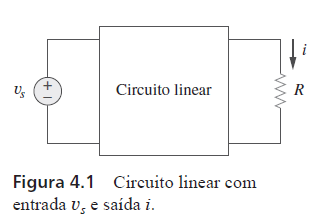

**Exemplo 4.1**

Para o circuito da Figura 4.2, determine Io quando vs = 12 V e vs = 24 V.

![](https://i.imgur.com/uGQNJ9P.png)

In [4]:
print("Exemplo 4.1")
import numpy as np

#Para vs = 12V
#6i1 + 2i1 + 4(i1 - i2) = -12
    #12i1 - 4i2 = -12
    #3i1 - i2 = -3
#-3vx -12 + 4(i2 - i1) + 8i2 + 4i2 = 0
    #vx = 2i1
    #-6i1 + 16i2 - 4i1 = 12
    #-10i1 + 16i2 = 12
    #-5i1 + 8i2 = 6
#i0 = i2

coef = np.matrix('3 -1;-5 8')
res = np.matrix('-3;6')
I = np.linalg.inv(coef)*res
print("Para vs = 12V, i0 é:",I[1],"A")

#Para vs = 24V
#6i1 + 2i1 + 4(i1 - i2) = -24
    #12i1 - 4i2 = -24
    #3i1 - i2 = -6
#-3vx -24 + 4(i2 - i1) + 8i2 + 4i2 = 0
    #vx = 2i1
    #-6i1 + 16i2 - 4i1 = 24
    #-10i1 + 16i2 = 24
    #-5i1 + 8i2 = 12
#i0 = i2

coef = np.matrix('3 -1;-5 8')
res = np.matrix('-6;12')
I = np.linalg.inv(coef)*res
print("Para vs = 12V, i0 é:",I[1],"A")

Exemplo 4.1
Para vs = 12V, i0 é: [[ 0.15789474]] A
Para vs = 12V, i0 é: [[ 0.31578947]] A


**Problema Prático 4.1**

Para o circuito da Figura 4.3, determine vo quando is = 30 A e is = 45 A.

![](https://i.imgur.com/IbOiCIU.png)

In [5]:
print("Problema Prático 4.1")
#Req1 = 12 + 8 = 20

#Para is = 30
i_s = 30
i0 = i_s*4/(4+20)
v0 = 8*i0
print("Para is = 30A, v0 é:",v0,"V")

#Para is = 45
i_s = 45
i0 = i_s*4/(4+20)
v0 = 8*i0
print("Para is = 45A, v0 é:",v0,"V")

Problema Prático 4.1
Para is = 30A, v0 é: 40.0 V
Para is = 45A, v0 é: 60.0 V


## Superposição

Uma forma de determinar uma variável específica em um circuito é determinar
a contribuição de cada fonte independente à variável e então somá-las. Essa
última forma é conhecida como **superposição**.

**O princípio da superposição afirma que a tensão (ou a corrente) em um
elemento em um circuito linear é a soma algébrica da soma das tensões
(ou das correntes) naquele elemento em virtude da atuação isolada de cada
uma das fontes independentes.**

1. Consideramos uma fonte independente por vez enquanto todas as demais fontes independentes estão desligadas. Isso implica substituir cada fonte de tensão por 0 V (ou um curto-circuito) e cada fonte de corrente por 0 A (ou um circuito aberto). 

2. As fontes dependentes são deixadas intactas, pois elas são controladas por variáveis de circuito.

**Etapas para a aplicação do princípio da superposição:**

1. Desative todas as fontes independentes, exceto uma delas. Encontre a saída (tensão ou corrente) em razão dessa fonte ativa

2. Repita a etapa 1 para cada uma das demais fontes independentes.

3. Encontre a contribuição total somando algebricamente todas as contribuições em razão das fontes independentes.

**Exemplo 4.3**

Use o teorema da superposição para encontrar v no circuito da Figura 4.6.

![](https://i.imgur.com/ulquDGl.png)

In [6]:
print("Exemplo 4.3")
Vs = 6
Is = 3
#Analise da fonte de tensao
v1 = Vs*4/(4 + 8)
#Analise da fonte de corrente
i2 = Is*8/(4 + 8)
v2 = 4*i2
v = v1 + v2
print("Tensão V:",v,"V")

Exemplo 4.3
Tensão V: 10.0 V


**Problema Prático 4.3**

Usando o teorema da superposição, determine vo, no circuito da Figura 4.8.

![](https://i.imgur.com/OP87uVW.png)

In [7]:
print("Problema Prático 4.3")
Vs = 12
Is = 5
#Analise da fonte de tensao
v1 = Vs*2/(2 + 3 + 5)
#Analise da fonte de corrente
i2 = Is*5/(2 + 3 + 5)
v2 = i2*2
v = v1 + v2
print("Tensão v0:",v,"V")

Problema Prático 4.3
Tensão v0: 7.4 V


**Exemplo 4.4**

Determine io no circuito da Figura 4.9 usando superposição.

![](https://i.imgur.com/skylO4f.png)

In [13]:
print("Exemplo 4.4")
Is = 4
Vs = 20

#Analise da fonte de tensao
#i1 = -i0
#5i1 + (i1 - i2) + 5i0 + 4i1 = 20
    #5i1 - i2 = 20
#-5i0 + (i2 - i1) + 3i2 + 2i2 = 0
    #5i1 -i1 + 6i2 = 0
    #4i1 + 6i2 = 0
    #2i1 + 3i2 = 0

coef = np.matrix('5 -1;2 3')
res = np.matrix('20;0')
Iv = np.linalg.inv(coef)*res
i0v = -I[0]

#Analise da fonte de corrente
#i0 = Is - i1 = 4 - i1
#5i0 + 4i1 + 5(i1 - Is) + i1 - i2 = 0
    #5(4 - i1) + 9i1 - 20 + (i1 - i2) = 0
    #5i1 - i2 = 0
#-5i0 + (i2 - i1) + 3(i2 - Is) + 2i2 = 0
    #-5(4 - i1) + 6i2 - i1 - 12 = 0
    #4i1 + 6i2 = 32
    #2i1 + 3i2 = 16

coef = np.matrix('5 -1;2 3')
res = np.matrix('0;16')
Ic = np.linalg.inv(coef)*res
i0c = Is-I[0]

i0 = i0v + i0c
print("Corrente i0:",float(i0),"A")

Exemplo 4.4
Corrente i0: 7.789473684210527 A


**Problema Prático 4.4**

Use superposição para determinar vx no circuito da Figura 4.11.

![](https://i.imgur.com/P5add6Q.png)

In [14]:
print("Problema Prático 4.4")
Vs = 25
Is = 5

#Analise fonte de tensao
#i1 + 0.1vx = i2
#i1 = (25 - vx)/20 = 5/4 - vx/20
#i2 = vx/4
#5/4 - vx/20 + vx/10 = vx/4
    # (-vx +2vx - 5vx)/20 = -5/4
    #-vx/5 = -5/4
    #vx = 25/4

#Analise fonte de corrente
#i1 + i2 = 5
#vx = 4*(i2 + 0.1vx)
    #6vx/10 = 4i2
    #i2 = 3vx/20
#vx = 20i1
    #i1 = vx/20
#vx/20 + 3vx/20 = 5
    #vx = 25

vx = 25 + 25/4
print("Tensão vx:",vx,"V")

Problema Prático 4.4
Tensão vx: 31.25 V


**Exemplo 4.5**

Para o circuito da Figura 4.12, use o teorema da superposição para determinar i.

![](https://i.imgur.com/C1uxdjX.png)

In [23]:
print("Exemplo 4.5")

#Analise Fonte Tensao 1
#Req1 = 8 + 4 = 12
#Req2 = (12*4)/(12 + 4) = 3
#Vx = 12*3/(3 + Req2) = 36/6 = 6
#iv1 = Vx/3 = 12/6 = 2 A
iv1 = 2

#Analise Fonte de Tensao 2
#Req1 = 8 + 4 = 12
#Req2 = (4*3)/(4+3) = 12/7
#Vx = 24*Req2/(Req2 + Req1)
    #Vx = 3
#iv2 = -Vx/3 = -1
iv2 = -1

#Analise da Fonte de Corrente
#Req1 = (4*3)/(4 + 3) = 12/7
#Req2 = Req1 + 4 = 40/7
#i1 = 3*8/(8 + Req2) = 24/(8 + 40/7)
i1 = 24/(8 + 40/7)
ic = i1*4/(4 + 3) # = 1

i = iv1 + iv2 + ic
print("Corrente i:",i,"A")

Exemplo 4.5
Corrente i: 2.0 A


**Problema Prático 4.5**

Determine I no circuito da Figura 4.14 usando o princípio da superposição.

![](https://i.imgur.com/vKdfb7E.png)

In [24]:
print("Problema Prático 4.5")

#Analise fonte de Tensao 1
iv1 = 8/(6 + 2 + 8)

#Analise da fonte de Tensao 2
iv2 = -6/(6 + 2 + 8)

#Analise da fonte de Corrente
ic = 2*2/(2 + 6 + 8)

i = iv1 + iv2 + ic

print("Corrente i:",i,"A")

Problema Prático 4.5
Corrente i: 0.375 A
